In [97]:
from sympy import solve
from sympy import Symbol
from math import cos, sin, pi, sqrt, tan, fabs
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

al = 0.05
m = 100

def majoraxis(A, B, C, D, E):
    return (((A*E**2 - B*D*E + C*D**2)/(4*A*C-B**2))/(A+C - sqrt((A-C)**2 + B**2)))
def minoraxis(A, B, C, D, E):
    return (((A*E**2 - B*D*E + C*D**2)/(4*A*C-B**2))/(A+C + sqrt((A-C)**2 + B**2)))


2.25 0.38461538461538464
9.000000000000002
4.000000000000001
be:-112.02882149941142
(0.08383719572365282, 8.383719572365282)
(1.6767439144730563, 0)
10x^2+-1xy+22.434764299882282y^2+-11.17829276315371x+-125.22909646315094y=0


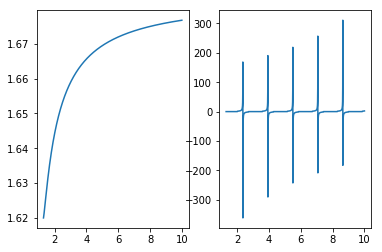

1.1736111111111114 0.07987220447284353
1.6900000000000004
1.4400000000000002
be:-56.778534542225216
(0.03613944458325277, 3.6139444583252773)
(0.7227888916650554, 0)
10x^2+-1xy+11.384706908445043y^2+-6.671897461523589x+-37.88205604813018y=0


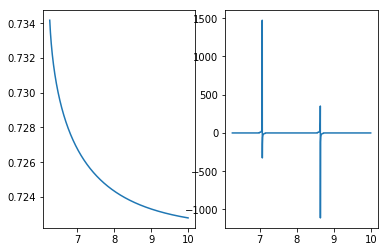

100.0 0.9801980198019802
99.99999999999997
1.0000000000000013
be:-4999.727471494435
(0.2827625930069065, 28.276259300690647)
(5.655251860138129, 0)
10x^2+-1xy+999.974494298887y^2+-5.655251860138133x+-2827.4718083352627y=0


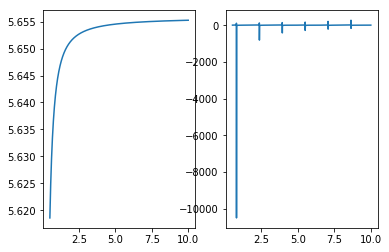

In [118]:
def g(a, b):
    q = a**2 / b**2
    w = (a**2-b**2)/(a**2+b**2)
    print(q, w)
    
    def printeq(A, B, C, D, E):
        if (fabs(A+C - sqrt((A-C)**2 + B**2)) < 1e-5):
            return 0
        
        print(majoraxis(A,B,C,D,E))
        print(minoraxis(A,B,C,D,E))
        h = getH(A, B, C, D, E)
        be = (-A*(al-1) + al * m - C * m**2*al)/m
        print(f"be:{be}")
        print(f"({h * al}, {h * al * m})")
        print(f"({h}, 0)")

        print(f"{A}x^2+{B}xy+{C}y^2+{D}x+{E}y=0")
    
    def getH(A, B, C, D, E):
        H = (4*A*C-B**2)*(A+C + sqrt((A-C)**2 + B**2))
        be = (-A*(al-1) + al * m - C * m**2*al)/m
        if (fabs(A * be**2 - A * be + C * A**2) < 1e-5):
            return 0
        return sqrt((a**2*H)/(A * be**2 - A * be + C * A**2))
    
    def eq(t):
        B = -1
        #C = (w + sqrt(t**2+1))/(2*t*w)
        #A = (-C*w**2 - C + sqrt(4*C**2*w**2 + w**2-1))/(w**2-1)
        #A = C - 1/t
        A = t
        if (4*A**2*w**2 + w**2 - 1 < 0):
            return (0,0,0,0,0)
        
        C = (-A*w**2 -A - sqrt(4*A**2*w**2 + w**2 - 1))/(w**2 - 1)
        
        H = (4*A*C-B**2)*(A+C - sqrt((A-C)**2 + B**2))
        be = (-A*(al-1) + al * m - C * m**2*al)/m
        
        if (fabs(A * be**2 - A * be + C * A**2) < 1e-5):
            return (0,0,0,0,0)
        
        h = sqrt((a**2*H)/(A * be**2 - A * be + C * A**2))
        D = -A * h
        E = h * be
        #print(f"({h * al}, {h * al * m})")
        #print(f"({h}, 0)")
        #print(f"{A}x^2+{B}xy+{C}y^2+{D}x+{E}y=0")
        return A, B, C, D, E
    
    def f(t):
        return eq((-w+sqrt(t**2+1))/(2*t*w))
    
    arr = np.linspace(1/(2*w), 10, 2000)
    
    y = [getH(*eq(x)) for x in arr]
    
    plt.subplot(121)
    plt.plot(arr, y)
    
    plt.subplot(122)
    y = [eq(tan(2*x))[0] for x in arr]
    plt.plot(arr, y)
    
    printeq(*eq(10))
    plt.show()

g(3, 2)
g(1.3, 1.2)
g(10, 1)